In [1]:
import numpy as np
import functools
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
n_transmon_levels = 5

omega_1 = 5 #GHz
delta_1 = 0.3 #GHz
omega_2 = 4.85 #GHz
delta_2 = 0.3 #GHz
g = 0.001 #GHz

In [25]:
def transmon_Hamiltonian(omega, delta, n_levels = 2):
    return np.diag([omega*n - delta/2.*n*(n-1) for n in range(n_levels)])

def destroy(n_levels):
    return np.diag([np.sqrt(n+1) for n in range(n_levels)], k = 1)

def create(n_levels):
    return np.diag([np.sqrt(n+1) for n in range(n_levels)], k = -1)

In [26]:
def two_transmon_Hamiltonian(om1, d1, om2, d2, g, n_levels = 2):
    H1 = transmon_Hamiltonian(om1, d1, n_levels)
    H2 = transmon_Hamiltonian(om2, d2, n_levels)
    H_bare = np.kron(H1, np.eye(n_levels)) + np.kron(np.eye(n_levels), H2)
    
    H_int = g*(np.kron(create(n_levels-1), destroy(n_levels-1)) + np.kron(destroy(n_levels-1), create(n_levels-1)))
    
    return H_bare + H_int

In [27]:
q1_control = np.kron(destroy(n_transmon_levels-1) + create(n_transmon_levels-1), np.eye(n_transmon_levels))
q2_control = np.kron(np.eye(n_transmon_levels), destroy(n_transmon_levels-1) + create(n_transmon_levels-1))

In [28]:
evals, evecs = np.linalg.eig(two_transmon_Hamiltonian(omega_1, delta_1, omega_2, delta_2, g))

In [29]:
def closest_eigenvector(evecs, t1_level, t2_level, n_levels):
    # returns the closest eigenvector to the one which has transmon 1 in t1_level and transmon 2 in t2_level
    ideal_eigenvector = np.kron(np.array([int(n == t1_level) for n in range(n_levels)]), np.array([int(n == t2_level) for n in range(n_levels)]))
    
    return evecs[:,np.argmax(np.abs(np.dot(ideal_eigenvector, evecs)))]
    

In [30]:
n_transmon_levels = 5

q1_control = np.kron(destroy(n_transmon_levels-1) + create(n_transmon_levels-1), np.eye(n_transmon_levels))
q2_control = np.kron(np.eye(n_transmon_levels), destroy(n_transmon_levels-1) + create(n_transmon_levels-1))

M1 = []
M2 = []
M3 = []

target_state_1 = 0
target_state_2 = 1
target_state_3 = 2

delta_range = np.linspace(-0.4,0.8,301)
for delta in delta_range:
    evals, evecs = np.linalg.eig(two_transmon_Hamiltonian(omega_1, delta_1, omega_1-delta, delta_2, g, n_levels = n_transmon_levels))
    M1.append(functools.reduce(np.dot, [closest_eigenvector(evecs, 0, target_state_1, n_transmon_levels), q1_control, closest_eigenvector(evecs, 0, target_state_2, n_transmon_levels)]))
#     M2.append(functools.reduce(np.dot, [closest_eigenvector(evecs, 1, target_state_1, n_transmon_levels), q1_control, closest_eigenvector(evecs, 1, target_state_2, n_transmon_levels)]))
#     M3.append(functools.reduce(np.dot, [closest_eigenvector(evecs, 2, target_state_1, n_transmon_levels), q1_control, closest_eigenvector(evecs, 2, target_state_2, n_transmon_levels)]))
    M2.append(functools.reduce(np.dot, [closest_eigenvector(evecs, 0, target_state_3, n_transmon_levels), q1_control, closest_eigenvector(evecs, 0, target_state_2, n_transmon_levels)]))

In [31]:
font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

Text(0.5,1,'CR Matrix Elements')

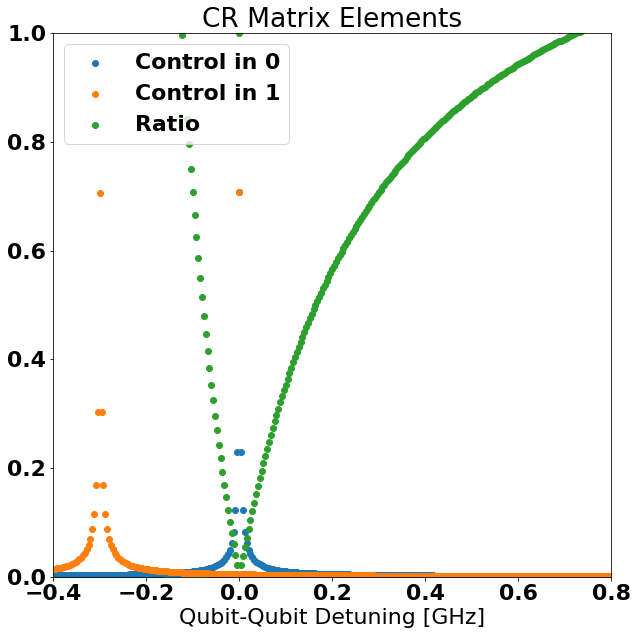

In [32]:
plt.figure(figsize = (10,10))
plt.scatter(delta_range, np.abs(M1), label = 'Control in 0')
plt.scatter(delta_range, np.abs(M2), label = 'Control in 1')
plt.scatter(delta_range, np.abs(M2)/np.abs(M1), label = 'Ratio')
# plt.scatter(delta_range, np.abs(M3), label = 'Control in 2')

# Analytics from first-order perturbation theory
# plt.plot(delta_range, g/delta_range)
# plt.plot(delta_range, -g/delta_range + 2*g/(delta_range - delta_2)) 
# plt.plot(delta_range, np.abs(2*g/(delta_range - delta_2) - 3*g/(delta_range - 2*delta_2)) )

plt.ylim(0,1)

# plt.plot(g_ranges, g_ranges/(omega_1-omega_2))
plt.legend(loc = 2)
plt.xlim(min(delta_range), max(delta_range))
plt.xlabel('Qubit-Qubit Detuning [GHz]')
plt.title('CR Matrix Elements')
# plt.xlim(-0.1,0.1)
# plt.ylim(0,0.5)

Text(0.5,1,u'GE CR')

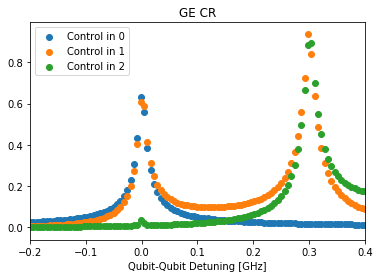

In [72]:
plt.scatter(delta_range, np.abs(M1), label = 'Control in 0')
plt.scatter(delta_range, np.abs(M2), label = 'Control in 1')
plt.scatter(delta_range, np.abs(M3), label = 'Control in 2')
# plt.plot(g_ranges, g_ranges/(omega_1-omega_2))
plt.legend(loc = 2)
plt.xlim(min(delta_range), max(delta_range))
plt.xlabel('Qubit-Qubit Detuning [GHz]')
plt.title('GE CR')

Text(0.5,0,'g - Coupling strength [GHz]')

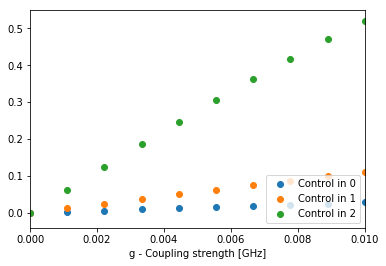

In [71]:
n_transmon_levels = 4

q1_control = np.kron(destroy(n_transmon_levels-1) + create(n_transmon_levels-1), np.eye(n_transmon_levels))
q2_control = np.kron(np.eye(n_transmon_levels), destroy(n_transmon_levels-1) + create(n_transmon_levels-1))

M1 = []
M2 = []
M3 = []

target_state_1 = 0
target_state_2 = 1

delta_range = np.linspace(0.1,0.25,35)
for delta in delta_range:
    evals, evecs = np.linalg.eig(two_transmon_Hamiltonian(omega_1, delta_1, omega_1-delta, delta_2, g, n_levels = n_transmon_levels))
    M1.append(functools.reduce(np.dot, [closest_eigenvector(evecs, 0, target_state_1, n_transmon_levels), q1_control, closest_eigenvector(evecs, 0, target_state_2, n_transmon_levels)]))
    M2.append(functools.reduce(np.dot, [closest_eigenvector(evecs, 1, target_state_1, n_transmon_levels), q1_control, closest_eigenvector(evecs, 1, target_state_2, n_transmon_levels)]))
    M3.append(functools.reduce(np.dot, [closest_eigenvector(evecs, 2, target_state_1, n_transmon_levels), q1_control, closest_eigenvector(evecs, 2, target_state_2, n_transmon_levels)]))

(0.0, 0.01)

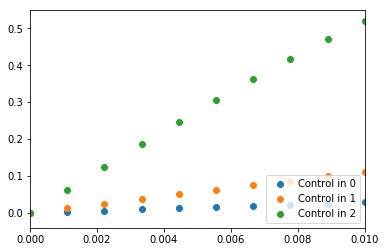

In [72]:
plt.scatter(g_ranges, np.abs(M1), label = 'Control in 0')
plt.scatter(g_ranges, np.abs(M2), label = 'Control in 1')
plt.scatter(g_ranges, np.abs(M3), label = 'Control in 2')
# plt.plot(g_ranges, g_ranges/(omega_1-omega_2))
plt.legend(loc = 4)
plt.xlim(min(g_ranges), max(g_ranges))

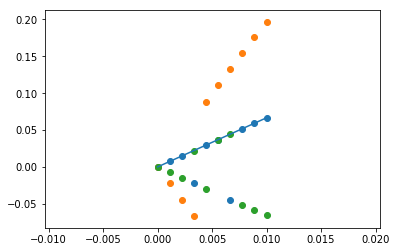

In [29]:
plt.scatter(g_ranges, M1)
plt.scatter(g_ranges, M2)
plt.scatter(g_ranges, M3)
plt.plot(g_ranges, g_ranges/(omega_1-omega_2))

In [22]:
evecs

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [86]:
import seaborn

ImportError: No module named seaborn

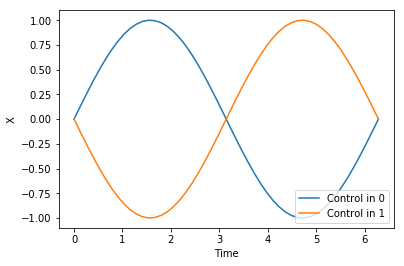

In [87]:
x = np.linspace(0,2*np.pi,50)
y1 = np.sin(x)
y2 = -y1
plt.plot(x,y1, label = 'Control in 0')
plt.plot(x,y2, label = 'Control in 1')
plt.xlabel('Time')
plt.ylabel('X')
plt.legend(loc = 4)